In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
# Standardization
from sklearn.preprocessing import StandardScaler
# Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Thread
from itertools import combinations
import threading
import time
# Our Module
import predpairnumber as pred
import numhardditect  as ditect

# Part 1 - Upload Dataset and create DataFrame

In [ ]:
data = np.load('mnist.npz')
X, y = data['X'], data['y']
X=np.transpose(X)
y=np.transpose(y)

In [ ]:
dataframe=pd.DataFrame(data=X)
dataframe['target']=y

In [ ]:
dataframe.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [ ]:
X_df=dataframe.loc[:,dataframe.columns != 'target']

In [ ]:
y_df=dataframe['target']

# Part 2 -Split and Normalize Data

In [ ]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_df, y_df, test_size=0.33, random_state=42)

In [ ]:
norm=StandardScaler().fit(X_train_)

In [ ]:
x_train_norm=norm.transform(X_train_)

In [ ]:
x_test_norm=norm.transform(X_test_)

# Part 3 - Use Knn model with different degrees

### Use Knn Dataset

In [ ]:
degrees=[i for i in range(1,10)]

In [ ]:
def knn(degrees,x_train_norm,x_test_norm):
  train_accuracy=[]
  test_accuracy=[]
  for degree in degrees:
      knn=KNeighborsClassifier(n_neighbors=degree)
      knn.fit(x_train_norm,y_train_)
      # test accuracy
      y_test_pred=knn.predict(x_test_norm)
      acu_test=accuracy_score(y_test_,y_test_pred)
      test_accuracy.append(acu_test)
      # train accuracy
      y_train_pred=knn.predict(x_train_norm)
      acu_train=accuracy_score(y_train_,y_train_pred)
      train_accuracy.append(acu_train)

  return train_accuracy,test_accuracy

In [ ]:
train_accuracy,test_accuracy=knn(degrees,x_train_norm,x_test_norm)

In [ ]:
train_accuracy

[1.0,
 0.9689800995024875,
 0.9687810945273632,
 0.9614179104477611,
 0.9601243781094527,
 0.9559701492537314,
 0.9540796019900497,
 0.950820895522388,
 0.9490796019900497]

In [ ]:
test_accuracy

[0.9403535353535354,
 0.9298989898989899,
 0.9409090909090909,
 0.9384343434343434,
 0.9405555555555556,
 0.937979797979798,
 0.9393939393939394,
 0.9369191919191919,
 0.9374747474747475]

### Plot with different degrees

Text(0, 0.5, 'Accuracy')

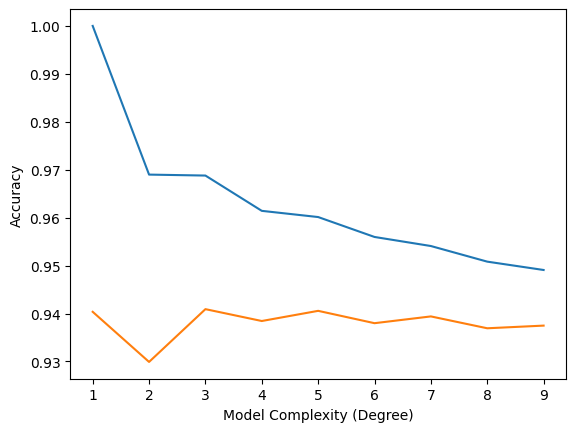

In [ ]:
plt.plot(degrees ,train_accuracy,label="train accuracy" )
plt.plot(degrees ,test_accuracy,label="test accuracy" )
plt.xlabel("Model Complexity (Degree)")
plt.ylabel("Accuracy")

# Part 4 - Train SVC model for two classes

In [ ]:
selected_df=dataframe[dataframe['target'].isin([1,0])]
selected_X=selected_df.loc[:,selected_df.columns !='target']
selected_y=selected_df['target']

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(selected_X,selected_y,test_size=0.33,random_state=42)

In [ ]:
parameters={'kernel':('linear','rbf'),'C':[1,10,100]}

In [ ]:
clf = GridSearchCV(SVC(), parameters)

In [ ]:
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'kernel': ('linear', 'rbf')})

In [ ]:
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [ ]:
svc=SVC(C=10,kernel='rbf')

In [ ]:
svc.fit(x_train,y_train)

SVC(C=10)

In [ ]:
y_pred=svc.predict(x_test)
accuracy_score(y_test,y_pred)

0.9995215311004785

### Calculate K-fold value

In [ ]:
best_k={}

In [ ]:
def calculate_accuracy(model,X,y,k):
    kfold=KFold(n_splits=k, random_state=None, shuffle=False)
    scores = cross_val_score(model, X, y, cv=kfold)
    accuracy = scores.mean()
    # Better known
    for i, (train_index, test_index) in enumerate(kfold.split(X)):
        print(f"Fold {i}:")
        print(f"  Train: index={train_index}")
        print(f"  Test:  index={test_index}")
        best_k[i]={'train_index':train_index,'test_index':test_index}
    return accuracy , scores

In [ ]:
acc,scores=calculate_accuracy(svc,selected_X,selected_y,5)

Fold 0:
  Train: index=[ 2533  2534  2535 ... 12662 12663 12664]
  Test:  index=[   0    1    2 ... 2530 2531 2532]
Fold 1:
  Train: index=[    0     1     2 ... 12662 12663 12664]
  Test:  index=[2533 2534 2535 ... 5063 5064 5065]
Fold 2:
  Train: index=[    0     1     2 ... 12662 12663 12664]
  Test:  index=[5066 5067 5068 ... 7596 7597 7598]
Fold 3:
  Train: index=[    0     1     2 ... 12662 12663 12664]
  Test:  index=[ 7599  7600  7601 ... 10129 10130 10131]
Fold 4:
  Train: index=[    0     1     2 ... 10129 10130 10131]
  Test:  index=[10132 10133 10134 ... 12662 12663 12664]


In [ ]:
acc

0.9988945913936045

In [ ]:
scores

array([0.99921042, 0.99802606, 0.99881563, 0.99881563, 0.99960521])

In [ ]:
best_k[0]

{'train_index': array([ 2533,  2534,  2535, ..., 12662, 12663, 12664]),
 'test_index': array([   0,    1,    2, ..., 2530, 2531, 2532])}

In [ ]:
x_train_new=selected_X.iloc[best_k[0]['train_index']]
y_train_new=selected_y.iloc[best_k[0]['train_index']]
x_test_new=selected_X.iloc[best_k[0]['test_index']]
y_test_new=selected_y.iloc[best_k[0]['test_index']]

In [ ]:
best_svc=SVC(C=10,kernel='rbf')
best_svc.fit(x_train_new,y_train_new)
y_predict=best_svc.predict(x_test_new)
accuracy_score(y_test_new,y_predict)

0.9992104224240032

### Confusion Matrix

In [ ]:
y_pred=svc.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[1979,    0],
       [   2, 2199]])

# Part 5 - SVM model for couple class

### The number of times each number in our pair of numbers was incorrectly recognized

In [ ]:
class_pairs = list(combinations(range(10), 2))

In [ ]:
svc_model=SVC(C=10,kernel='rbf')

In [ ]:
number_of_misdiagnosis=[]
for i,pair in enumerate(class_pairs):
    pred_result=pred.pred_pair_num(dataframe.copy(),pair,svc_model)
    result=pred_result.train_model_return_acc()
    print(result)
    data_info=ditect.numberhardditect(result)
    if data_info != 1 :
       number_of_misdiagnosis.append(data_info)


{'model': (0, 1), 'accuracy': 0.9995215311004785, 'False detect 0': 0, 'False detect 1': 2}
{'model': (0, 2), 'accuracy': 0.9982147411374649, 'False detect 0': 5, 'False detect 2': 2}
{'model': (0, 3), 'accuracy': 0.9989944695827049, 'False detect 0': 2, 'False detect 3': 2}
{'model': (0, 4), 'accuracy': 0.9984548029873809, 'False detect 0': 4, 'False detect 4': 2}
{'model': (0, 5), 'accuracy': 0.9981303418803419, 'False detect 0': 4, 'False detect 5': 3}
{'model': (0, 6), 'accuracy': 0.9966734902763562, 'False detect 0': 8, 'False detect 6': 5}
{'model': (0, 7), 'accuracy': 0.9990057171265225, 'False detect 0': 1, 'False detect 7': 3}
{'model': (0, 8), 'accuracy': 0.9974266598044261, 'False detect 0': 3, 'False detect 8': 7}
{'model': (0, 9), 'accuracy': 0.996937212863706, 'False detect 0': 2, 'False detect 9': 10}
{'model': (1, 2), 'accuracy': 0.9959436888570747, 'False detect 1': 15, 'False detect 2': 2}
{'model': (1, 3), 'accuracy': 0.9983525535420099, 'False detect 1': 5, 'False d

In [ ]:
number_of_misdiagnosis

['in model (0, 9) , 9 hard to detect for 10 times',
 'in model (1, 2) , 1 hard to detect for 15 times',
 'in model (2, 3) , 2 and 3 hard to detect',
 'in model (2, 7) , 2 hard to detect for 15 times',
 'in model (2, 8) , 2 and 8 hard to detect',
 'in model (3, 5) , 3 and 5 hard to detect',
 'in model (3, 8) , 3 hard to detect for 18 times',
 'in model (3, 9) , 3 hard to detect for 11 times',
 'in model (4, 7) , 4 and 7 hard to detect',
 'in model (4, 9) , 4 and 9 hard to detect',
 'in model (5, 8) , 5 hard to detect for 13 times',
 'in model (7, 9) , 7 hard to detect for 16 times',
 'in model (8, 9) , 8 hard to detect for 11 times']

In [ ]:
threadLock=threading.Lock()
number_of_misdiagnosis=[]
threads=[]

class myThread(threading.Thread):
      def __init__(self,df,pair,svc_model):
        threading.Thread.__init__(self)
        self.df=df
        self.pair=pair
        self.svc_model=svc_model

      def run(self):

        threadLock.acquire()
        pred_result=pred.pred_pair_num(self.df,self.pair,self.svc_model)
        result=pred_result.train_model_return_acc()
        data_info=ditect.numberhardditect(result)
        if data_info != 1 :
           number_of_misdiagnosis.append(data_info)
        threadLock.release()



In [ ]:
for i,value in enumerate(class_pairs):
    thread = myThread(dataframe,value,svc_model)
    threads.append(thread)
    thread.start()

In [ ]:
for thread in threads:
    thread.join()

In [ ]:
number_of_misdiagnosis

['in model (0, 9) , 9 hard to detect for 10 times',
 'in model (1, 2) , 1 hard to detect for 15 times',
 'in model (2, 3) , 2 and 3 hard to detect',
 'in model (2, 7) , 2 hard to detect for 15 times',
 'in model (2, 8) , 2 and 8 hard to detect',
 'in model (3, 5) , 3 and 5 hard to detect',
 'in model (3, 8) , 3 hard to detect for 18 times',
 'in model (3, 9) , 3 hard to detect for 11 times',
 'in model (4, 7) , 4 and 7 hard to detect',
 'in model (4, 9) , 4 and 9 hard to detect',
 'in model (5, 8) , 5 hard to detect for 13 times',
 'in model (7, 9) , 7 hard to detect for 16 times',
 'in model (8, 9) , 8 hard to detect for 11 times']

## Conclusion

Totaly our model have 99% accuracy

# Part 6 - Predict number with 45 models

In [ ]:
class_pairs = list(combinations(range(10), 2))

In [ ]:
class pred_num_with_45_model():
  def __init__(self,df,class_pairs):
    self.df=df
    # self.model=model
    self.pair_models={}
    self.output={}
    self.class_pairs=class_pairs
  def create_model(self):

      for pair in class_pairs:
        class_1, class_2 = pair
        selected_df=self.df[self.df['target'].isin([class_1,class_2])]
        selected_X=selected_df.loc[:,selected_df.columns !='target']
        selected_y=selected_df['target']

        X_train, X_test, y_train, y_test = train_test_split(selected_X, selected_y, test_size=0.33, random_state=42)
        svc_=SVC(C=10,kernel='rbf')
        svc_.fit(X_train,y_train)
        self.pair_models[f"{pair}"]=svc_
  def predict_model(self,input_X):
    self.create_model()
    for key in self.pair_models:
        number_pred=self.pair_models[key].predict([input_X])
        self.output[f'{key}']=number_pred[0]

    most_frequent = np.bincount(list(self.output.values())).argmax()
    return ("Most frequent number:", most_frequent)


In [ ]:
input_X=np.array(dataframe.loc[6000 , dataframe.columns !='target'])

In [ ]:
pred_num=pred_num_with_45_model(dataframe,class_pairs)

In [ ]:
pred_num.predict_model(input_X)

('Most frequent number:', 1)

# Part 7 - Compare proceeds

In terms of performance, there is not much difference between them, in terms of precision and accuracy, both are almost equal, but in terms of runtime, the speed is higher in svc